# Data description
The business meaning of each column in the data is as below

price: The price of the Diamond

carat: The carat value of the Diamond

cut: The cut type of the Diamond, it determines the shine

color: The color value of the Diamond

clarity: The carat type of the Diamond

depth: The depth value of the Diamond

table: Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.

x: Width of the diamond

y: Length of the diamond

z: Height of the diamond


In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
DPricesData=pd.read_csv(r'C:\Users\SAYAN\Desktop\Python Datasets\Regression Datasets\DiamondPricesData.csv', encoding='latin')
print('Shape before deleting duplicate values:', DPricesData.shape)

# Removing duplicate rows if any
DPricesData=DPricesData.drop_duplicates()
print('Shape After deleting duplicate values:', DPricesData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
DPricesData.head(10)

Shape before deleting duplicate values: (53940, 10)
Shape After deleting duplicate values: (53794, 10)


,Price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
6,336,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,337,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
8,337,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49
9,338,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39


# Looking at the distribution of Target variable

<AxesSubplot:>

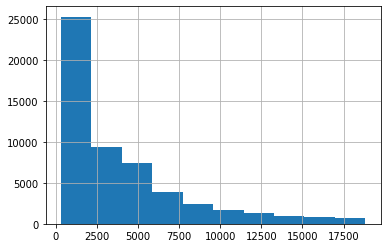

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
DPricesData['Price'].hist()

# Basic Data Exploration

In [4]:
DPricesData.head()

,Price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [5]:
DPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    53794 non-null  int64  
 1   carat    53794 non-null  float64
 2   cut      53794 non-null  object 
 3   color    53788 non-null  object 
 4   clarity  53794 non-null  object 
 5   depth    53780 non-null  float64
 6   table    53794 non-null  float64
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [6]:
DPricesData.describe(include='all')

,Price,carat,cut,color,clarity,depth,table,x,y,z
count,53794.000000,53794.00000,53794,53788,53794,53780.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21488,11256,13032,NaN,NaN,NaN,NaN,NaN
mean,3933.065082,0.79778,NaN,NaN,NaN,61.748154,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,NaN,NaN,NaN,1.429948,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.030000


In [7]:
DPricesData.nunique()

Price      11602
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
dtype: int64

# Visual Exploratory Data Analysis

In [8]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

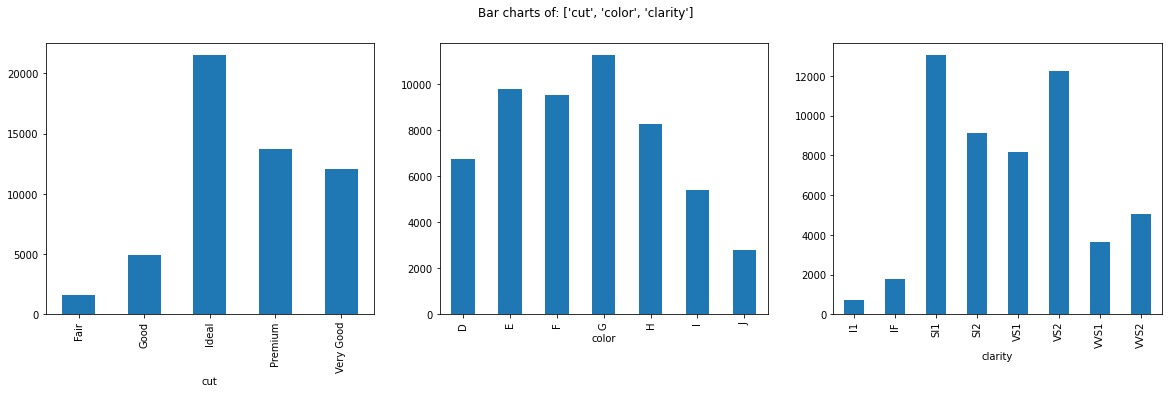

In [9]:
PlotBarCharts(inpData=DPricesData, colsToPlot=['cut','color','clarity'])

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>]], dtype=object)

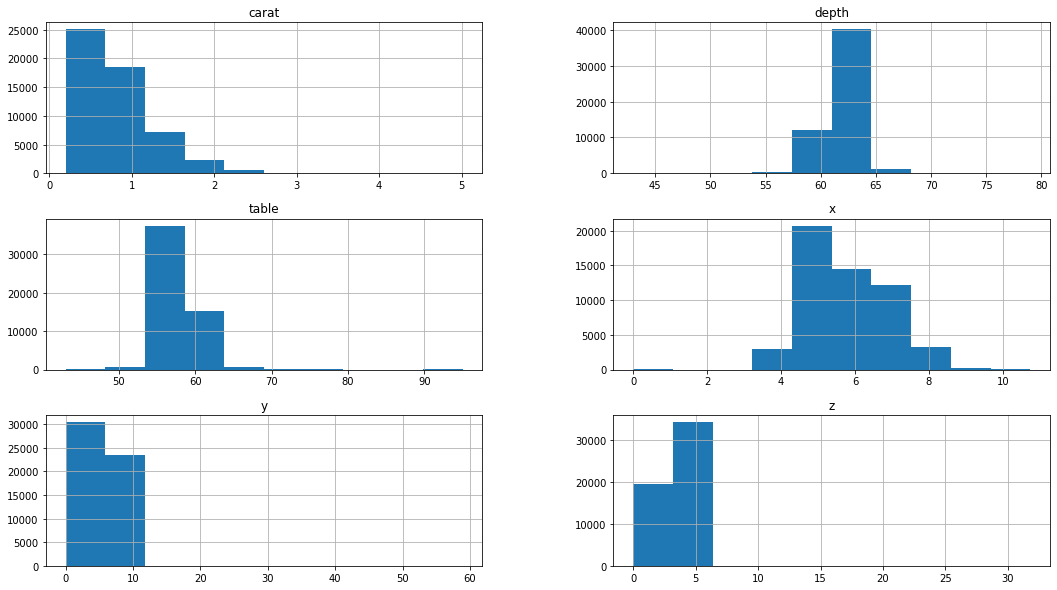

In [10]:
DPricesData.hist(['carat','depth','table','x','y','z'], figsize=(18,10))

# Outlier treatment

In [11]:
DPricesData['x'][DPricesData['x']>2].sort_values(ascending=True)
DPricesData['x'][DPricesData['x']<3.73] =3.73

In [12]:
DPricesData['y'][DPricesData['y']<20].sort_values(ascending=False)
DPricesData['y'][DPricesData['y']>20] =10.54

In [13]:
DPricesData['z'][DPricesData['z']<10].sort_values(ascending=False)
DPricesData['z'][DPricesData['z']>8] =6.98

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

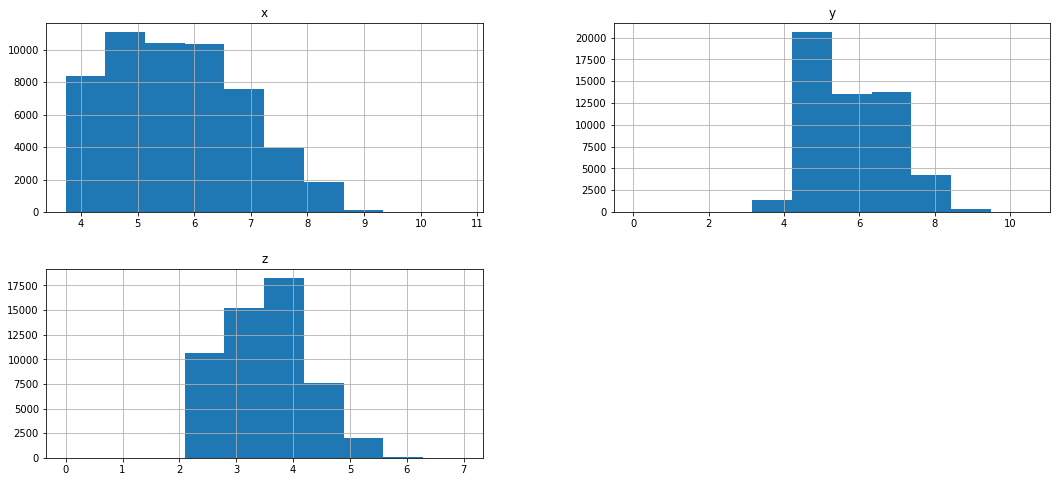

In [14]:
DPricesData.hist(['x','y', 'z'], figsize=(18,8))

In [15]:
DPricesData['y'][DPricesData['y']>2].sort_values(ascending=True)

31600     3.68
31596     3.71
31598     3.71
31601     3.72
31599     3.73
         ...  
25998    10.10
27630    10.16
27415    10.54
49189    10.54
24067    10.54
Name: y, Length: 53788, dtype: float64

In [16]:
DPricesData['y'][DPricesData['y']<2] =3.68

In [17]:
DPricesData['z'][DPricesData['z']>2].sort_values(ascending=True)

39246    2.06
31592    2.24
47138    2.25
31591    2.26
14       2.27
         ... 
27130    6.43
27630    6.72
24067    6.98
27415    6.98
48410    6.98
Name: z, Length: 53772, dtype: float64

In [18]:
DPricesData['z'][DPricesData['z']<2]=2.06

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

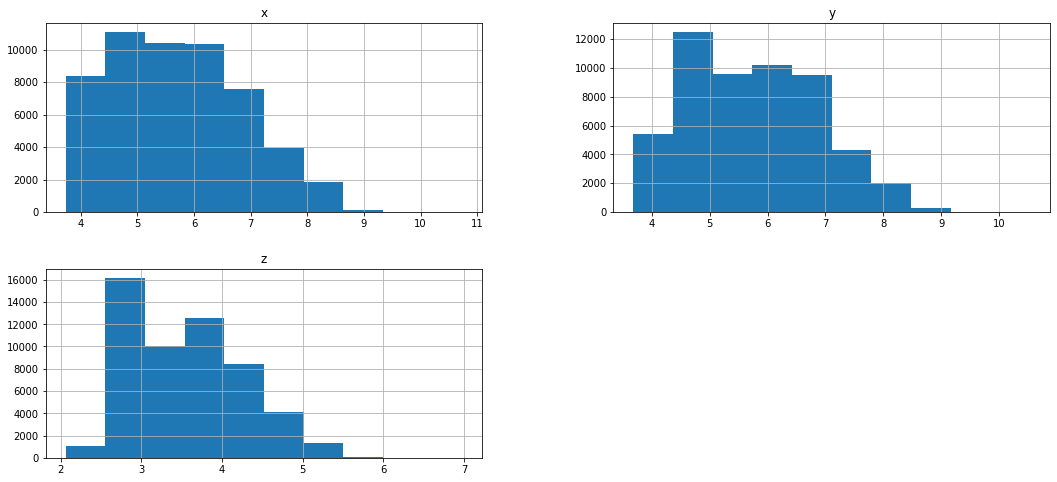

In [19]:
DPricesData.hist(['x','y', 'z'], figsize=(18,8))

In [20]:
DPricesData.isnull().sum()

Price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [21]:
DPricesData['color'].fillna(value=DPricesData['color'].mode()[0], inplace=True)
DPricesData['depth'].fillna(value=DPricesData['depth'].median(), inplace=True)

In [22]:
DPricesData.isnull().sum()

Price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# Feature Selection & Outliers

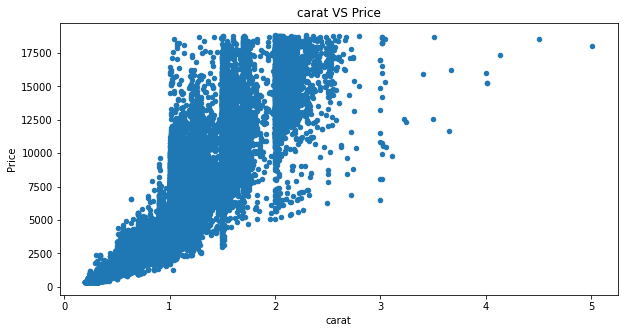

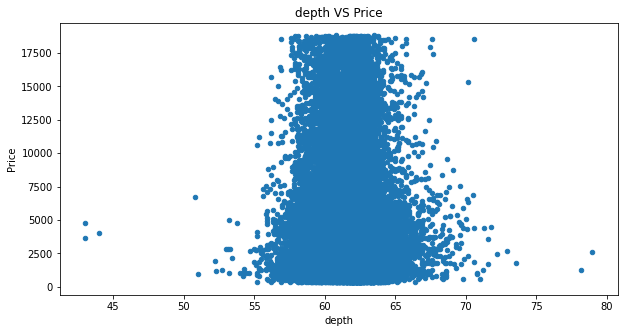

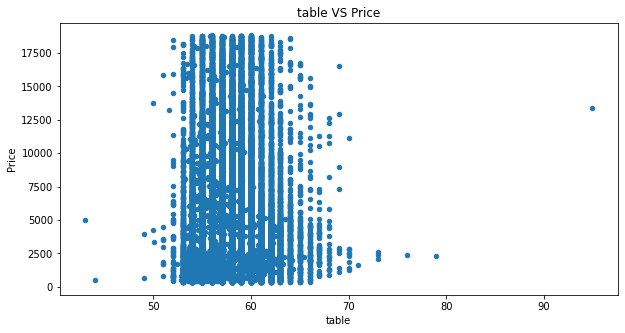

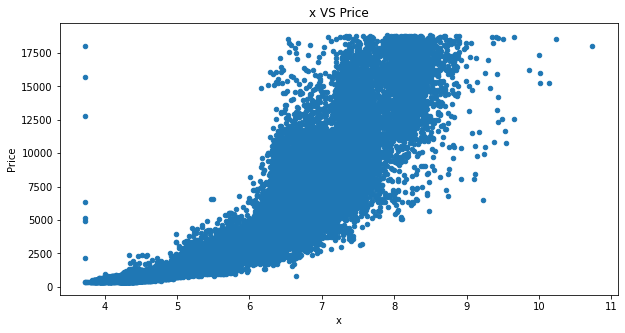

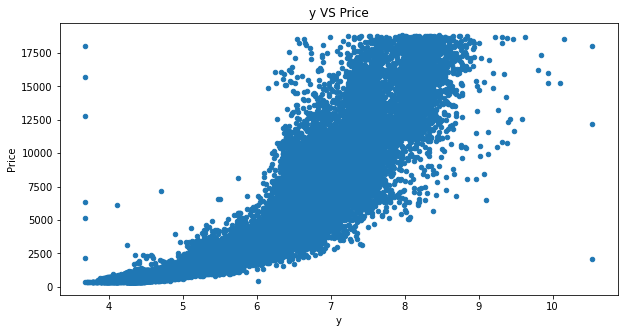

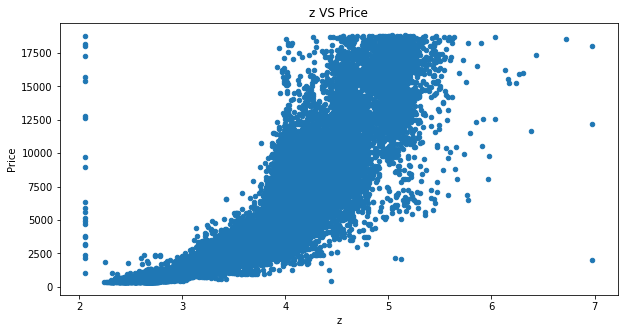

In [23]:
ContinuousCols=['carat','depth','table','x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    DPricesData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

In [24]:
DataFilter=(DPricesData['z']>2.06) & (DPricesData['z']<6.5)
DPricesData=DPricesData[DataFilter]

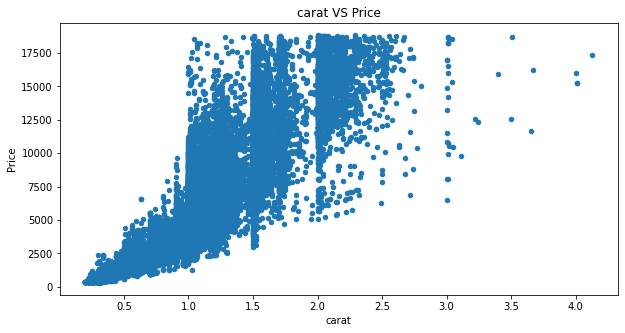

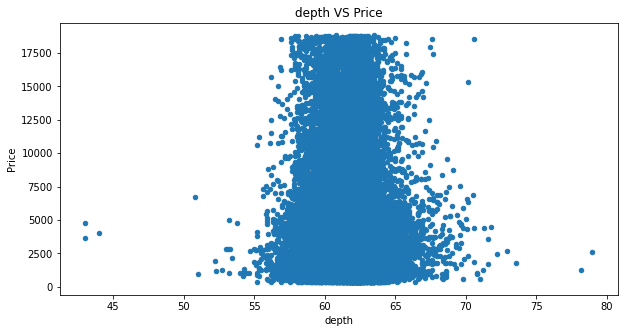

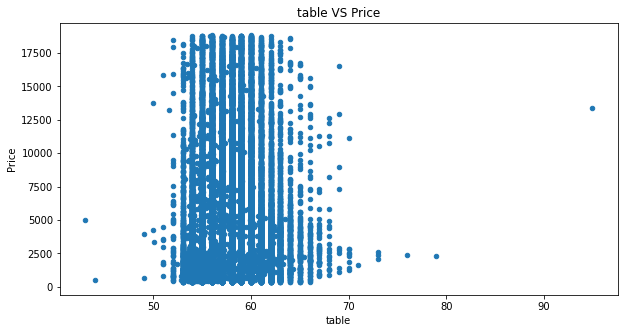

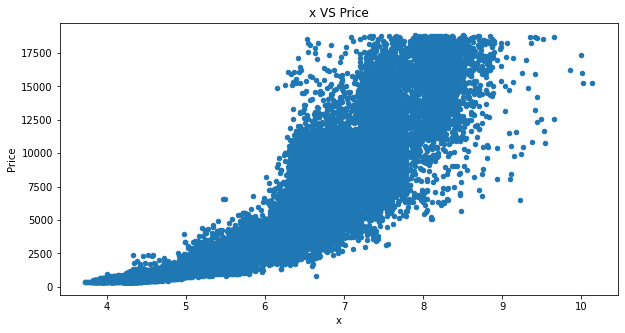

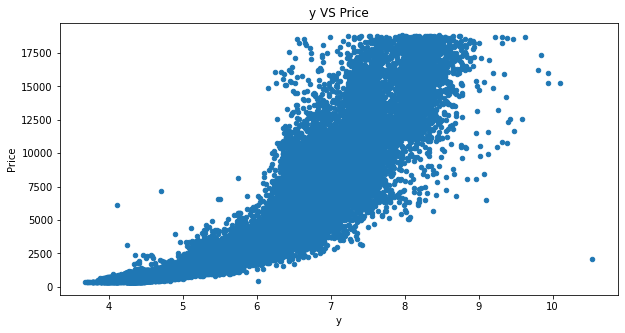

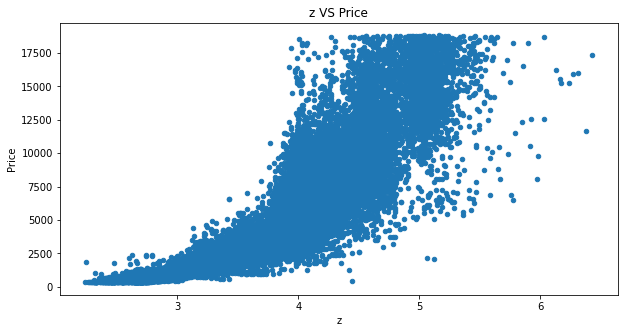

In [25]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    DPricesData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

In [26]:
# Calculating correlation matrix
ContinuousCols=['Price','carat','depth','table','x','y','z']

# Creating the correlation matrix
CorrelationData=DPricesData[ContinuousCols].corr()
CorrelationData

,Price,carat,depth,table,x,y,z
Price,1.000000,0.921845,-0.011424,0.126696,0.887063,0.888460,0.882354
carat,0.921845,1.000000,0.027212,0.181277,0.978136,0.977011,0.977179
depth,-0.011424,0.027212,1.000000,-0.297608,-0.025531,-0.028635,0.095916
table,0.126696,0.181277,-0.297608,1.000000,0.195519,0.189201,0.154926
x,0.887063,0.978136,-0.025531,0.195519,1.000000,0.998435,0.991574
y,0.888460,0.977011,-0.028635,0.189201,0.998435,1.000000,0.991271
z,0.882354,0.977179,0.095916,0.154926,0.991574,0.991271,1.000000


In [27]:
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.2 ]

Price    1.000000
carat    0.921845
x        0.887063
y        0.888460
z        0.882354
Name: Price, dtype: float64

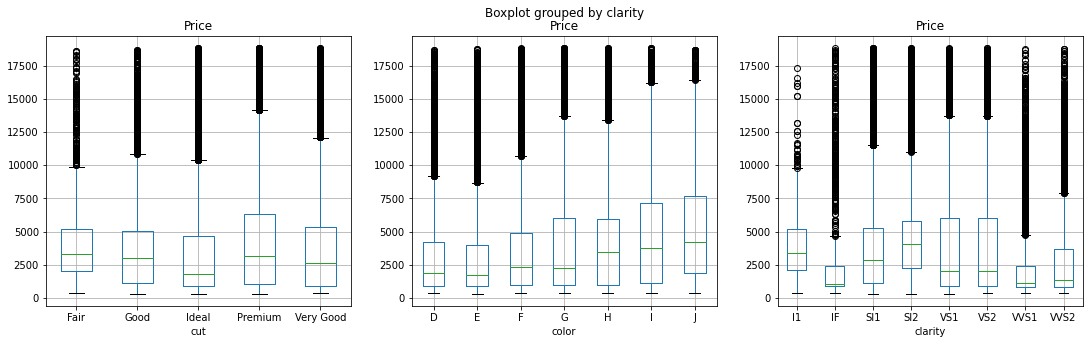

In [28]:
CategoricalColsList=['cut','color','clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    DPricesData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [29]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [30]:
CategoricalPredictorList=['cut','color','clarity']
FunctionAnova(inpData=DPricesData, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with Price | P-Value: 2.41639003272117e-146
color is correlated with Price | P-Value: 0.0
clarity is correlated with Price | P-Value: 1.655076560414e-312


['cut', 'color', 'clarity']

# Selecting final predictors for Machine Learning

In [31]:
SelectedColumns=['cut','color','clarity','carat','x','y','z']

# Selecting final columns
DataForML=DPricesData[SelectedColumns]
DataForML.head()

,cut,color,clarity,carat,x,y,z
0,Ideal,E,SI2,0.23,3.95,3.98,2.43
1,Premium,E,SI1,0.21,3.89,3.84,2.31
2,Good,E,VS1,0.23,4.05,4.07,2.31
3,Premium,I,VS2,0.29,4.20,4.23,2.63
4,Good,J,SI2,0.31,4.34,4.35,2.75


In [32]:
DataForML.to_pickle('DataForML.pkl')

# Data Pre-processing for Machine Learning

In [33]:
DataForML['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [34]:
# Replacing the ordinal values
DataForML['cut'].replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)

In [35]:
DataForML['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [36]:
# Replacing the ordinal values
DataForML['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

In [37]:
DataForML['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [38]:
DataForML['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

In [39]:
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=DPricesData['Price']

# Printing sample rows
DataForML_Numeric.head()

,cut,color,clarity,carat,x,y,z,Price
0,4,6,3,0.23,3.95,3.98,2.43,326
1,5,6,2,0.21,3.89,3.84,2.31,326
2,1,6,4,0.23,4.05,4.07,2.31,327
3,5,2,5,0.29,4.20,4.23,2.63,334
4,1,1,3,0.31,4.34,4.35,2.75,335


In [40]:
DataForML_Numeric.columns

Index(['cut', 'color', 'clarity', 'carat', 'x', 'y', 'z', 'Price'], dtype='object')

# Machine Learning: Splitting the data into Training and Testing sample

In [41]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['cut', 'color', 'clarity', 'carat', 'x', 'y', 'z']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Standardization/Normalization of data

In [42]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37636, 7)
(37636,)
(16131, 7)
(16131,)


# Linear Regression

In [44]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.8990644042515243

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   4039          4265.0
1   3239          3589.0
2   6089          6015.0
3   9660          7284.0
4   2326          2614.0
Mean Accuracy on test data: 59.75615085548515
Median Accuracy on test data: 77.36475798797849

Accuracy values for 10-fold Cross Validation:
 [61.5205416  69.61187421 78.8435249  75.85682864 75.4520242  17.0499129
 29.69858832 41.33422654 56.13340688 65.1282487 ]

Final Average Accuracy of the model: 57.06


# Decision Tree

DecisionTreeRegressor(max_depth=10)
R2 Value: 0.9813787032743522

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   4039          3163.0
1   3239          3682.0
2   6089          6620.0
3   9660         10207.0
4   2326          2564.0
Mean Accuracy on test data: 90.68629846218654
Median Accuracy on test data: 92.83161239078633

Accuracy values for 10-fold Cross Validation:
 [81.15540602 84.78008707 84.24980634 81.35515788 77.59916326 81.22559652
 83.38836556 79.15083407 80.56002654 82.33799339]

Final Average Accuracy of the model: 81.58


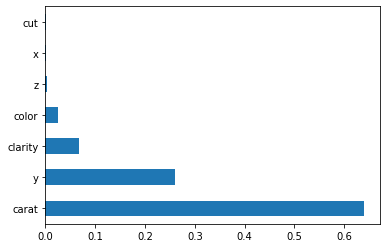

In [45]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=10,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Random Forest

RandomForestRegressor(max_depth=5)
R2 Value: 0.9476820260892659

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   4039          3181.0
1   3239          3181.0
2   6089          7283.0
3   9660         10728.0
4   2326          2352.0
Mean Accuracy on test data: 84.26228113013863
Median Accuracy on test data: 87.8048780487805

Accuracy values for 10-fold Cross Validation:
 [73.86630502 81.98855948 80.40124846 73.49223792 77.97351375 79.37415692
 78.70700323 71.0683197  79.59151511 78.36604977]

Final Average Accuracy of the model: 77.48


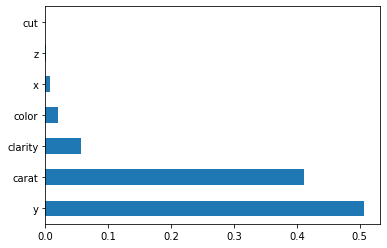

In [46]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=5, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Adaboost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.01, n_estimators=100)
R2 Value: 0.9851094779904498

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   4039          3227.0
1   3239          3254.0
2   6089          6361.0
3   9660         10179.0
4   2326          2442.0
Mean Accuracy on test data: 91.31410659426145
Median Accuracy on test data: 93.32746091169346

Accuracy values for 10-fold Cross Validation:
 [81.67430894 85.71413    84.88860625 81.92940796 78.47356208 81.21967658
 84.24617977 81.30333134 81.3725276  82.16427924]

Final Average Accuracy of the model: 82.3


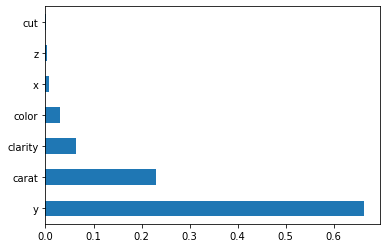

In [47]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost

XGBRegressor(max_depth=2, n_estimators=1000)
[09:40:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9779276198934674

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   4039          3475.0
1   3239          3291.0
2   6089          6366.0
3   9660          8690.0
4   2326          2641.0
Mean Accuracy on test data: 85.92081928253174
Median Accuracy on test data: 91.28440380096436
[09:41:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:41:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:42:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:42:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:42:38] WARNING: src/objective/regress

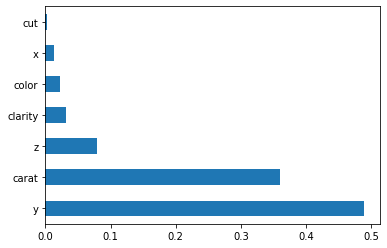

In [48]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# KNN

In [49]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=4)
R2 Value: 0.9851667157835505

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0   4039          3422.0
1   3239          3310.0
2   6089          5906.0
3   9660          9823.0
4   2326          2538.0
Mean Accuracy on test data: 91.97731080903206
Median Accuracy on test data: 94.44065484311051

Accuracy values for 10-fold Cross Validation:
 [84.09348049 86.94355869 86.20778736 83.91441112 81.31634721 82.43343805
 83.90357783 83.10938798 83.66534552 84.49341509]

Final Average Accuracy of the model: 84.01


# Deployment of the Model

I am choosing KNN as the final model since it is very fast for this data!

In [50]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['carat','y', 'color' , 'clarity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(53767, 4)
(53767,)


In [51]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

# Training the model on 100% Data available
Final_KNN_Model=RegModel.fit(X,y)

In [52]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_KNN_Model, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [83.93745166 86.68504646 86.13021249 83.69627634 81.28995539 79.79591784
 82.66804902 82.99292523 83.88674132 84.14375815]

Final Average Accuracy of the model: 83.52


In [53]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_KNN_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_KNN_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\SAYAN


# Function for predictions API

In [54]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Treating ordinal variables
    # Replacing the ordinal values of color
    InputData['color'].replace({  'J':1, 
                                  'I':2,
                                  'H':3,
                                  'G':4,
                                  'F':5,
                                  'E':6,
                                  'D':7
                                 }, inplace=True)
    
    # Replacing the ordinal values for clarity
    InputData['clarity'].replace({'I1':1,
                                  'SI1':2,
                                  'SI2':3,
                                  'VS1':4,
                                  'VS2':5,
                                  'VVS1':6,
                                  'VVS2':7,
                                  'IF':8
                                 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['carat','y', 'color' , 'clarity']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_KNN_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genprice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [55]:
# Calling the function for new sample data
NewSampleData=pd.DataFrame(
data=[[0.23,3.98,'E','SI2'],
     [0.29, 4.23,'I','VS2']],
columns=['carat','y', 'color' , 'clarity'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   carat     y color clarity
0   0.23  3.98     E     SI2
1   0.29  4.23     I     VS2


,Prediction
0,401.25
1,412.50


In [56]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_carat, inp_y, inp_color, inp_clarity):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_carat , inp_y, inp_color, inp_clarity]],
     columns=['carat','y', 'color', 'clarity'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predicted value
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(  inp_carat=0.29,
                             inp_y =4.23,
                             inp_color='I',
                             inp_clarity='VS2'
                             )

'{"Prediction":{"0":412.5}}'

# Creating Flask API

In [57]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [58]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        carat_value = float(request.args.get('carat'))
        y_value=float(request.args.get('y'))
        color_value=request.args.get('color')
        clarity_value=request.args.get('clarity')
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                         inp_carat=carat_value,
                                                         inp_y =y_value,
                                                         inp_color=color_value,
                                                         inp_clarity=clarity_value
                                                      )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine

In [63]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Oct/2020 09:52:04] "GET /prediction_api?carat=0.29&y=4.23&color=I&clarity=VS2 HTTP/1.1" 200 -
127.0.0.1 - - [11/Oct/2020 09:52:04] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [11/Oct/2020 09:52:56] "GET /prediction_api?carat=0.29&y=4.23&color=I&clarity=VS2 HTTP/1.1" 200 -
127.0.0.1 - - [11/Oct/2020 09:54:16] "GET /prediction_api?carat=0.29&y=4.23&color=I&clarity=VS2 HTTP/1.1" 200 -
127.0.0.1 - - [11/Oct/2020 09:54:25] "GET /prediction_api?carat=0.29&y=4.23&color=I&clarity=VS2 HTTP/1.1" 200 -
127.0.0.1 - - [11/Oct/2020 09:54:58] "GET /prediction_api?carat=0.5&y=5&color=E&clarity=VVS2 HTTP/1.1" 200 -
127.0.0.1 - - [11/Oct/2020 10:58:52] "GET /prediction_api?carat=0.5&y=5&color=E&clarity=VVS2 HTTP/1.1" 200 -
127.0.0.1 - - [11/Oct/2020 10:58:59] "GET /prediction_api?carat=0.5&y=5&color=E&clarity=VVS2 HTTP/1.1" 200 -
127.0.0.1 - - [11/Oct/2020 10:59:14] "GET /prediction_api?carat=0.5&y=5&color=E&clarity=VS2 HT

# Copy and paste below URL in the web browser
# http://127.0.0.1:8080/prediction_api?carat=0.5&y=5&color=E&clarity=VS2